# Comportamiento de inversion en los departamentos de Colombia según la información del SECOP II - Contratos Electrónicos

SECOP II es la plataforma pública en Colombia donde se registran los procesos de contratación de las Entidades Estatales registradas. 


El SECOP II es una plataforma transaccional que permite a Compradores y Proveedores realizar el Proceso de Contratación en línea. Desde su cuenta, las Entidades Estatales (Compradores) pueden crear y adjudicar Procesos de Contratación, registrar y hacer seguimiento a la ejecución contractual. En este informe se hará un análisis de los contratos electrónicos en las ciudades del departamento del meta

https://dev.socrata.com/foundry/www.datos.gov.co/jbjy-vk9h

### Integrantes

Juan Speck $ \\ $
Julian Buitrago 

### Librerias

In [17]:
import pandas as pd
import numpy as np
# pip install sodapy
from sodapy import Socrata
from dataprep.eda import plot
import matplotlib.pyplot as plt
#pip install pandas-profiling
from pandas_profiling import ProfileReport
import plotly.express as px
pd.set_option('display.float_format',lambda x: '%.5f' % x) # Configuramos el ambiente para que 
# muestre datos en número y no usando notación cientifica
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import *

pd.set_option('display.float_format',lambda x: '%.5f' % x) # Configuramos el ambiente para que muestre el formato de numero completo
pd.set_option('display.width', 500)

### Carga de Datos

In [18]:
pw="Datos.1995%"

Se usa el token que tiene la página de datos abiertos

In [19]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("www.datos.gov.co",
                  "oDDpMpf3aXZ4q26Tup5GwhU4D",
                  username="julian.buitrago88@gmail.com",
                  password=pw)

Usamos un query con lenguaje de SQL con el fin de traer solo la información que necesitamos para lograr responder nuestra pregunta inicial, con lo cual, se define un objeto que contenga el equery, para traer solo las columnas a interes del DataFrame de datos abiertos - SECOP II 

In [20]:
query='''
SELECT
nombre_entidad,
departamento,
ciudad,
orden,
rama,
estado_contrato,
tipo_de_contrato,
valor_del_contrato,
fecha_de_inicio_del_contrato,
fecha_de_firma,
fecha_de_fin_del_contrato,
es_pyme,
modalidad_de_contratacion
WHERE fecha_de_fin_del_contrato < '2200-12-31' 
limit 2000000
'''
# En esta linea "fecha_de_fin_del_contrato < '2200-12-31'" debido a que se identifico que existe uno o varios registros con una fecha no valida

results2 = client.get("jbjy-vk9h", query=query)
results_df2 = pd.DataFrame.from_records(results2)

In [21]:
results_df2.columns

Index(['nombre_entidad', 'departamento', 'ciudad', 'orden', 'rama',
       'estado_contrato', 'tipo_de_contrato', 'valor_del_contrato',
       'fecha_de_inicio_del_contrato', 'fecha_de_firma',
       'fecha_de_fin_del_contrato', 'es_pyme', 'modalidad_de_contratacion'],
      dtype='object')

Identificamos el tamaño de nuestro Dataset

In [22]:
results_df2.shape

(1419291, 13)

### Ejercicio 1

##### Hacer una exploración por las siguientes variables que permita entender ¿qué miden? ¿qué categorías admiten? 


El siguiente paso, es revisar como esta definido el dataset, que tipo de datos son:

In [23]:
results_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419291 entries, 0 to 1419290
Data columns (total 13 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   nombre_entidad                1419291 non-null  object
 1   departamento                  1419291 non-null  object
 2   ciudad                        1419291 non-null  object
 3   orden                         1419291 non-null  object
 4   rama                          1419291 non-null  object
 5   estado_contrato               1419291 non-null  object
 6   tipo_de_contrato              1419291 non-null  object
 7   valor_del_contrato            1419291 non-null  object
 8   fecha_de_inicio_del_contrato  1273515 non-null  object
 9   fecha_de_firma                1327245 non-null  object
 10  fecha_de_fin_del_contrato     1419291 non-null  object
 11  es_pyme                       1419291 non-null  object
 12  modalidad_de_contratacion     1419291 non-

##### Orden

In [24]:
results_df2['orden'].value_counts()

Territorial             791104
Nacional                612318
Corporación Autónoma     15867
No Definido                  2
Name: orden, dtype: int64

Al realizar la exploración de la variable orden nos permite entender: $ \\ $ $ \\ $
##### ¿Que mide? $ \\ $
La variable "orden" es una variable categorica donde nos muestra el campo de acción del contrato a nivel nacional o a nivel territorial, donde a  nivel territorial hace referencia a si es un municipio, distrito o departamento. 
$ \\ $
##### ¿Qué categorías admiten? $ \\ $
La variable "orden" esta compuesta de cuatro (3) categorias, siendo Territorial, Nacional, Corporación Autónoma, y tenemos una cuarta categoria para aquellos contratos donde no se logra indentificar a que orden pertenecen.
$ \\ $
##### ¿Cómo afecta el problema que nos compete?
El "orden" afecta el valor de la inversion, debido al origen de los recursos, ya que a nivel nacional puede haber un mayor presupuesto que el de entes territoriales o el de corporaciones autonomas, pero al haber haber mayor cantidad de territorios, el numero de contratos es superior que al de los demas "ordenes"


##### Rama

In [25]:
results_df2['rama'].value_counts()

Ejecutivo               1222333
Corporación Autónoma     172143
Judicial                  15471
Legislativo                9342
No Definido                   2
Name: rama, dtype: int64

Al realizar la exploración de la variable Rama nos permite entender: $ \\ $ $ \\ $
##### ¿Que mide? $ \\ $
La variable "Rama" es una variable categorica donde nos muestra las de poder publicas que tiene el pais estado
$ \\ $
##### ¿Qué categorías admiten? $ \\ $
La variable "Rama" esta compuesta de cuatro (4) categorias, siendo Ejecutivo , Corporación Autónoma, Judicial, Legislativo y tenemos una quinta categoria para aquellos contratos donde no se logra indentificar a que rama pertencen "No definido"

##### ¿Cómo afecta el problema que nos compete?
Al revisar los datos se evidencia que el poder ejecutivo tiene un mayor número de contratos, ya que desde esta rama se realizan todas las inversiones destinadas a las actividades administrativas que están al servicio de los intereses generales de la comunidad para el cumplimiento de los fines esenciales del Estado.


##### Departamento

In [26]:
results_df2['departamento'].value_counts()

Distrito Capital de Bogotá                  704772
Valle del Cauca                             133236
Antioquia                                    88917
Santander                                    53827
Atlántico                                    44272
Tolima                                       34452
Cundinamarca                                 32986
Bolívar                                      30771
Risaralda                                    25496
Meta                                         21928
Huila                                        21584
Boyacá                                       21141
Quindío                                      20765
Norte de Santander                           19971
Caldas                                       19858
Nariño                                       17531
Cauca                                        17297
Casanare                                     14220
Magdalena                                    13171
Sucre                          

Al realizar la exploración de la variable departamento nos permite entender: $ \\ $ $ \\ $
##### ¿Que mide? $ \\ $
La variable "Departamento" es una variable categorica donde nos la ubicación geografica tomando como referencia el departamento del pais. 
$ \\ $
##### ¿Qué categorías admiten? $ \\ $
Esta variable tiene 32 departamentos del pais, y un distrito especial que es "Distrito Capital de Bogotá", ademas de que cuenta con una categoria para aquellos contratos que no se logra indentificar a que departamento pertencen "No definido".
['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar',
       'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar',
       'Chocó', 'Cundinamarca', 'Córdoba', 'Distrito Capital de Bogotá',
       'Guainía', 'Guaviare', 'Huila', 'La Guajira', 'Magdalena', 'Meta',
       'Nariño', 'Norte de Santander', 'Putumayo',
       'Quindío', 'Risaralda', 'San Andrés, Providencia y Santa Catalina',
       'Santander', 'Sucre', 'Tolima', 'Valle del Cauca', 'Vaupés',
       'Vichada']       
$ \\ $     
##### ¿Cómo afecta el problema que nos compete?
La variable Departamento es la que mas se ve impactada por la diferencia en la cantidad de contratos, ya que puede existir una relacion entre el numero de habitantes de cada region y la inversión. Esta hipotesis se validará en el punto 4 del documento. De igual manera se puede observar que a nivel de cantidad de contratos, la mayoria se concentran en los Departamentos que se encuentran ubicados al interior del país, mientras que los departamentos perifericos no tienen el mismo grado de inversion, por lo que se puede observar una gran brecha entre los diferentes departamentos

##### Tipo_de_contrato

In [27]:
results_df2['tipo_de_contrato'].value_counts()

Prestación de servicios       1197429
Otro                            60409
Compraventa                     43043
Suministros                     41358
DecreeLaw092/2017               35791
Obra                            13046
Arrendamiento de inmuebles      12844
Interventoría                    3776
Comodato                         3579
Consultoría                      3270
Seguros                          2128
Acuerdo Marco de Precios          674
Arrendamiento de muebles          452
Asociación Público Privada        386
No Especificado                   338
Servicios financieros             228
Emprestito                        181
Comisión                          108
Concesión                          76
Negocio fiduciario                 73
Venta muebles                      68
Venta inmuebles                    18
Acuerdo de cooperación             16
Name: tipo_de_contrato, dtype: int64

Al realizar la exploración de la variable tipo de contrato nos permite entender: $ \\ $ $ \\ $
##### ¿Que mide? $ \\ $
La variable "tipo de contrato" es una variable categorica donde nos se hace referencia a la modalidad de contración legal que se manejan en el pais.

el departamento del pais. 
$ \\ $
##### ¿Qué categorías admiten? $ \\ $
Esta variable tiene 23 categorias del pais, siendo:
['Acuerdo Marco de Precios', 'Acuerdo de cooperación',
       'Arrendamiento de inmuebles', 'Arrendamiento de muebles',
       'Asociación Público Privada', 'Comisión', 'Comodato',
       'Compraventa', 'Concesión', 'Consultoría', 'DecreeLaw092/2017',
       'Emprestito', 'Interventoría', 'Negocio fiduciario', 'Obra', 'Otro', 'Prestación de servicios',
       'Seguros', 'Servicios financieros', 'Suministros',
       'Venta inmuebles', 'Venta muebles']
ademas de que cuenta con una categoria para aquellos contratos que no se logra indentificar a que departamento pertencen "No Especificado ".
$ \\ $
##### ¿Cómo afecta el problema que nos compete?
En la mayoria de contratos con los entes publicos, se puede observar claramente que la mayoria se destina para prestacion de servios (Contratacion), aunque no es tan claro como esta variable afecta el problema planteado

##### Estado_contrato

In [28]:
 results_df2['estado_contrato'].value_counts()

En ejecución         477791
Modificado           365811
Activo               278364
terminado            134482
Cerrado               57207
Borrador              47952
enviado Proveedor     25080
En aprobación         19622
cedido                10211
Suspendido             2627
Prorrogado              144
Name: estado_contrato, dtype: int64

Al realizar la exploración de la variable estado_contrato nos permite entender: $ \\ $ $ \\ $
##### ¿Que mide? $ \\ $
La variable "estado_contrato" es una variable categorica que nos permite identificar en que etapa del proceso de contratación se encuentra el contrato 
$ \\ $
##### ¿Qué categorías admiten? $ \\ $
Esta variable tiene 11 categorias, siendo:
['Activo', 'Borrador', 'Cerrado', 'En aprobación', 'En ejecución',
       'Modificado', 'Prorrogado', 'Suspendido', 'cedido',
       'enviado Proveedor', 'terminado']
$ \\ $
##### ¿Cómo afecta el problema que nos compete?
La variable estado_contrato ayuda a identificar junto con la fecha de inicio del contrato cuanto tiempo lleva en ejecución el mismo, y asi determinar que tan eficiente es la ejecución de cada uno a nivel departamental, se logra evidenciar con los datos obtenidos que la mayoria de contratos se encuentran en ejecucion.

##### Es_pyme

In [29]:
results_df2['es_pyme'].value_counts()

No    1175757
Si     243534
Name: es_pyme, dtype: int64

Al realizar la exploración de la variable es_pyme nos permite entender: $ \\ $ $ \\ $
##### ¿Que mide? $ \\ $
La variable "es_pyme" es una variable categorica que nos permite identificar si la entidad legal constituida la cual esta ejecutando el contrato, es o no es una pyme (Pequeña o mediana empresa)
$ \\ $
##### ¿Qué categorías admiten? $ \\ $
Esta variable tiene 2 categorias, siendo:
['No', 'Si']
$ \\ $
##### ¿Cómo afecta el problema que nos compete?

Esta variable no impacta en el problema planteado, debido a que no existe una ley que obligue a contratar con algun tipo de empresa en particular, pero se logra evidenciar que la mayoria de contratos estan relacionados con empresas que no son Pymes.

### Ejercicio 2
##### Crear un reporte (con un miniaplicativo incluido) que permita visualizar lo siguiente:

Al revisar el dataset, debemos de realizar una conversión de las columnas que son objetos a datos fecha

In [30]:
results_df2['fecha_de_inicio_del_contrato']= pd.to_datetime(results_df2['fecha_de_inicio_del_contrato'], format='%Y-%m-%d %H:%M:%S.%f')
results_df2['fecha_de_fin_del_contrato']= pd.to_datetime(results_df2['fecha_de_fin_del_contrato'], format='%Y-%m-%d %H:%M:%S.%f')

Se crean columnas de año para facilitar las busquedas

In [31]:
results_df2['agno_de_inicio_del_contrato']=results_df2[results_df2['fecha_de_inicio_del_contrato'].notnull()]['fecha_de_inicio_del_contrato'].dt.year.astype("object")
results_df2['agno_de_fin_del_contrato']=results_df2[results_df2['fecha_de_fin_del_contrato'].notnull()]['fecha_de_fin_del_contrato'].dt.year.astype("object")

De igual manera, se realiza la conversión de las columnas que son objetos a datos númericos

In [33]:
results_df2['valor_del_contrato']=results_df2['valor_del_contrato'].astype(float).astype(int)


In [34]:
results_df2.describe()

,valor_del_contrato
count,1419291.00000
mean,33208612.73734
std,264927146.14173
min,-2147483648.00000
25%,9000000.00000
50%,19738632.00000
75%,39264250.00000
max,2147344489.00000


In [94]:
def funcion(i,y):
    #Se filtra el dataframe con el año seleccionado en el filtro
    DF2=results_df2[results_df2['agno_de_inicio_del_contrato']==i]
    
    #Condicional para determinar que accion ejecutar segun filtro
    if(y=='Valor contrato'): #Condicional para visualizar los valores de los contratos por año y departamento
        DF2=DF2.groupby(['agno_de_inicio_del_contrato','departamento'])[['valor_del_contrato']].sum().sort_values(
   by="valor_del_contrato",ascending=False)
        print(DF2)
    if(y=='Cantidad contratos'):  #Condicional para visualizar la cantidad de contratos por año y departamento
        DF2=DF2.groupby(['agno_de_inicio_del_contrato','departamento']).size().sort_values(ascending=False)
        print(DF2)
    if(y=='Cant.contratos sin fecha de inicio'): #Condicional para visualizar la cantidad de contratos por departamento que no tengan fecha de inicio
        DF2=results_df2[results_df2['agno_de_inicio_del_contrato'].isna()][['departamento']]
        DF2=DF2.groupby(['departamento']).size().sort_values(ascending=False) 
        print(DF2)
    if(y=='Excl. datos atipicos'):#Condicional para excluir los datos atipicos del contrato
        Q1=results_df2.quantile(0.25).values[0] #Determinar el valor del cuartil 1
        Q3=results_df2.quantile(0.75).values[0] #Determinar el valor del cuartil 3
        IQR=(Q3-Q1)*1.5 #Formula para calcular el rango intercuantilico *1.5, este valor se le restara al Q1 y se le sumara al Q3 para determinar los valores atipicos
        DF2=results_df2[(results_df2['valor_del_contrato']>=(Q1-IQR)) & (results_df2['valor_del_contrato']<=(Q3+IQR)) & (results_df2['agno_de_inicio_del_contrato']==i)]
        DF2=DF2.groupby(['agno_de_inicio_del_contrato','departamento']).size().sort_values(ascending=False) 
        print(DF2)
    return

In [90]:
#Creacion de la lista de años para visualizar en el filtro
año=results_df2.sort_values(['agno_de_inicio_del_contrato'],ascending = [True])
año=año[año['agno_de_inicio_del_contrato'].notnull()]['agno_de_inicio_del_contrato'].unique()
print(año)

[2002 2007 2008 2009 2010 2013 2015 2016 2017 2018 2019 2020 2021 2022
 2024 2028 2030]


In [95]:
#Visualizacion del reporte
interact(funcion,i=widgets.Dropdown(options=año,description="Year"),y=widgets.RadioButtons(options=['Valor contrato', 'Cantidad contratos', 'Cant.contratos sin fecha de inicio', 'Excl. datos atipicos'],description="Opcion"))

interactive(children=(Dropdown(description='Year', options=(2002, 2007, 2008, 2009, 2010, 2013, 2015, 2016, 20…

<function __main__.funcion(i, y)>

#####  Suma de valores de contratos por departamento según un rango de fechas que use la fecha de inicio de contratos. Facilitar la consulta en regiones por año.

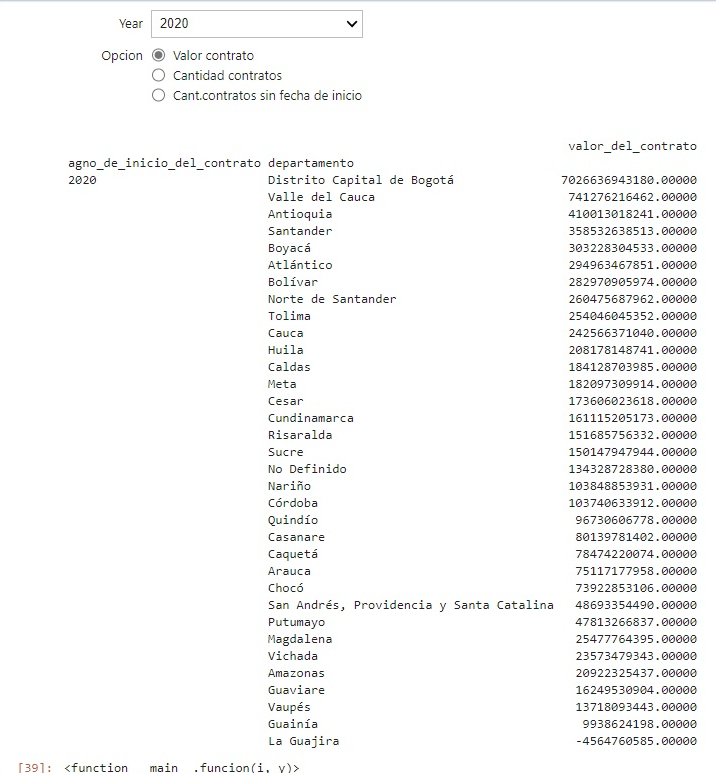

##### En el reporte anterior incluir cantidad de contratos por región, también deben visualizarse los contratos que no posean fecha de inicio ¿Cuántos son?

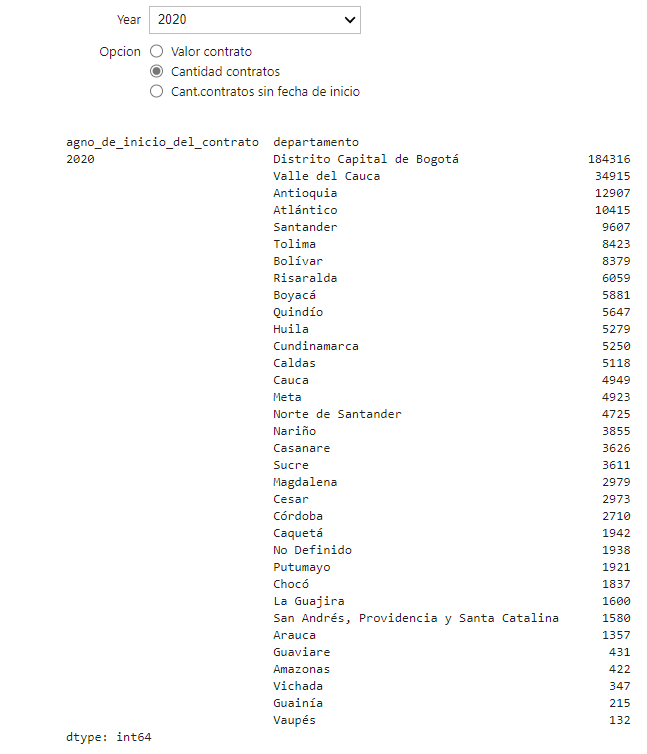

también deben visualizarse los contratos que no posean fecha de inicio ¿Cuántos son?

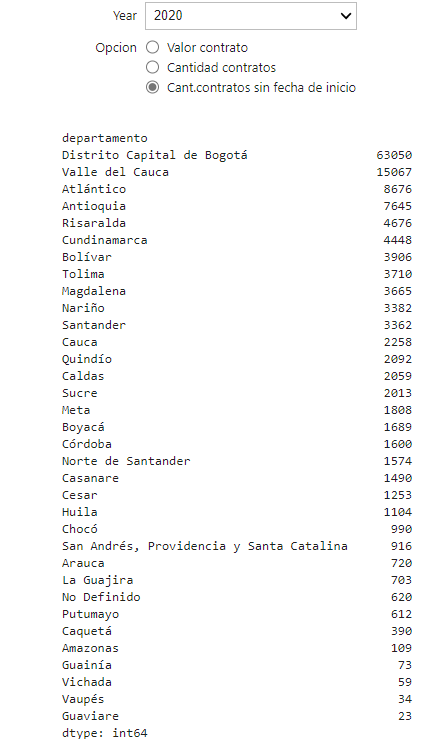

##### Permita excluir datos atípicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor.

El criterio seleccionado para excluir los datos atipicos es el de rango intercuantilico (IQR), ya que permite determinar los valores que difieren de un patrón general en un conjunto de datos de muestra.

IQR se usa para medir la variabilidad dividiendo un conjunto de datos en cuartiles. Los datos se clasifican en orden ascendente y se dividen en 4 partes iguales. Q1, Q2, Q3 llamados primer, segundo y tercer cuartiles son los valores que separan las 4 partes iguales.

La formula utilizada para esta implementacion es:
##### IQR = Q3 - Q1
IQR es el rango entre el primer y el tercer cuartil, a saber, Q1 y Q3: IQR = Q3 - Q1 . Los puntos de datos que caen por debajo de Q1 - 1.5 IQR o por encima de Q3 + 1.5 IQR son valores atípicos.

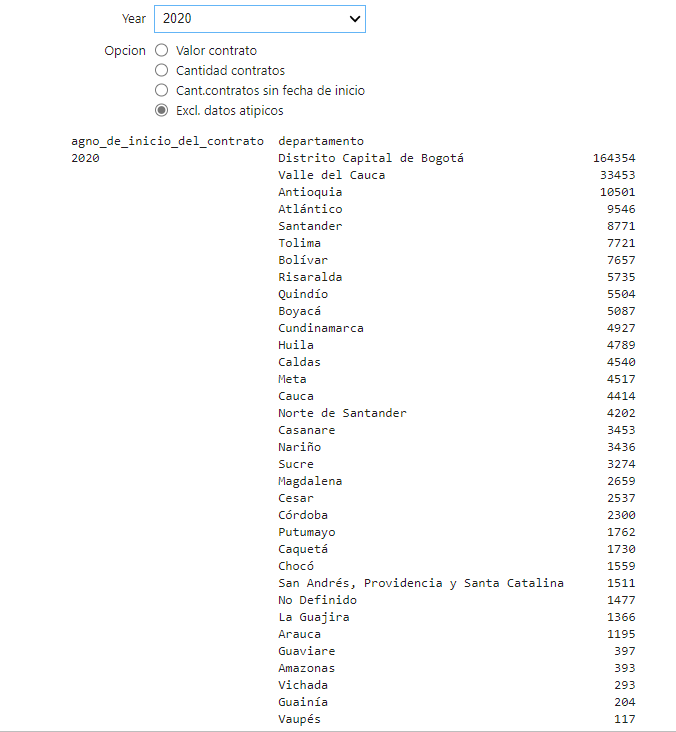




### Ejercicio 3
##### ¿La suma de valores de contratos es un buen índice para identificar ’desigualdad’ entre regiones? Claramente la distribución de Suma de valor de contrato por departamento es bastante dispersa, sin embargo, si se consideran aspectos demográficos de cada departamento se entendería la gran amplitud del rango en la suma del valor de contratos por región. Utilice información demográfica de cada departamento para crear nuevas variables que nos permitan un mejor entendimiento de la distribución de la variable suma del valor de Contrato (por ejemplo, una variable como "suma de valor de contrato per cápita"). Justifique las variables creadas.

In [100]:
# Se carga una dataframe donde se encuentra la población por departamento, se utilizo la siguiente fuente <https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_poblaci%C3%B3n>
Poblacion_departamentos_2021 = pd.read_excel("Poblacion_departamentos_2021.xlsx",sheet_name='Hoja1') # Se uso un read excel para leer el archivo con los datos
Poblacion_departamentos = Poblacion_departamentos_2021.sort_values(['departamento'],ascending = [True]) # se organizaron los departamentos por orden alfabetico
#Poblacion_departamentos

In [101]:
# Se extrae los valores de los contratos por departamento y se suman para tener un total
DF3=results_df2.groupby(['departamento'])[['valor_del_contrato']].sum().sort_values(['departamento'],ascending = [True]) #Se crea un dataframe donde se agrupan los datos por 
# departamento y se realiza la suma del valor del contrato y se organizaron los departamentos por orden alfabetico
#DF3

In [110]:
#Se usa merge combinar los dos dataframes en uno solo dataframe, tomando como columna primaria el departamento, obteniendo un dataframe con los datos de población y la sumatoria del gasto según departamento
Datos_departamento = pd.merge(DF3, Poblacion_departamentos,on=["departamento", "departamento"]);Datos_departamento
Datos_departamento['suma_de_valor_de_contrato_per_capita'] = Datos_departamento['valor_del_contrato'] / Datos_departamento['Poblacion_2020'] # Se crea una nueva columna en donde se divide la 
# sumatoria de los valor de los contratos por la población de cada departamento para obtener un indice que se llama "suma_de_valor_de_contrato_per_capita"
Datos_departamento.sort_values(['suma_de_valor_de_contrato_per_capita'],ascending = [False]) # Se organiza el dataframe según el indice de "suma_de_valor_de_contrato_per_capita" de mayor a menor

                                departamento   valor_del_contrato  \
14  Distrito Capital de Bogotá               25869972693430.00000   
26  San Andrés, Providencia y Santa Catalina 189228852381.00000     
5   Boyacá                                   1085246918619.00000    
29  Tolima                                   1147520168559.00000    
25  Risaralda                                712773993621.00000     
15  Guainía                                  36061857953.00000      
17  Huila                                    798121136936.00000     
0   Amazonas                                 55867476109.00000      
2   Arauca                                   207737985372.00000     
31  Vaupés                                   31367638720.00000      
6   Caldas                                   709390896736.00000     
30  Valle del Cauca                          3094898381651.00000    
8   Casanare                                 294303058625.00000     
24  Quindío                       

Para hallar el indice de suma_de_valor_de_contrato_per_capitá se uso la siguiente formula:  $ \\ $
$  \frac{suma valor del contrato por departamento}{Población del departamento} $

Con lo cual, con la operación anterior aplicada a cada departamento, se obtiene el indicador de 'suma_de_valor_de_contrato_per_capita', observando por ejemplo, que el top 3 de este indice esta compuesto por Distrito Capital de Bogotá {3.340.666,71 COP}, en segundo lugar San Andrés, Providencia y Santa Catalina {2.970.998,74 COP} y luego Boyacá {873.275,80 COP}

In [ ]:
Datos_departamento['departamento'].count() # Validamos cuantos departamentos tiene el dataframe

### Ejercicio 4
#####  Se ve un grado de inversión más regular en los departamentos. Haga observaciones y recomendaciones al respecto, use la información del Ejercicio 1.

In [139]:
Datos_departamento.sort_values(['Poblacion_2020'],ascending = [False]) # Se organiza el dataframe según la población de mayor a menor
# para ver patrones o saltos en el indice de "suma_de_valor_de_contrato_per_capita" 

,departamento,valor_del_contrato,Poblacion_2020,suma_de_valor_de_contrato_per_capita
14,Distrito Capital de Bogotá,25869972693430.00000,7743955,3340666.71274
1,Antioquia,2770427017373.00000,6677930,414863.14133
30,Valle del Cauca,3094898381651.00000,4532152,682876.12191
12,Cundinamarca,1015634032455.00000,3242999,313177.41154
3,Atlántico,1315234854518.00000,2722128,483164.22098
27,Santander,1440919411718.00000,2280908,631730.61418
4,Bolívar,999434866244.00000,2180976,458251.19866
13,Córdoba,248774226730.00000,1828947,136020.46791
21,Nariño,500226940737.00000,1627589,307342.29633
22,Norte de Santander,565913837430.00000,1620318,349260.97064


Al revisar el dataframe con el indicador creado, se evidencia que existe una desigualdad en la inversión que tienen ciertos departamentos que tienen una población similar, por ejemplo, el departamento de Cesar tiene una población de 1.295.387 habitantes y un indice de "suma_de_valor_de_contrato_per_capita" de 302,112,49 COP, mientras que Boyacá con 1.242.731 habitantes y un indice de "suma_de_valor_de_contrato_per_capita" de 873.275,81 COP; se observa que los dos departamentos teniendo una población similar, el gasto en contratos publicos en Boyacá es un 189% por encima de Cesar, evidenciando una desigualdad en el gasto publico evidente. 

Lo que permite asegurar que la inversion en los departamentos que se encuentran al interior del País son superiores a los departamentos ubicados en los extremos del mismo.

### Ejercicio 5
#####   Incluya lo anterior en el mini aplicativo del Ejercicio 2

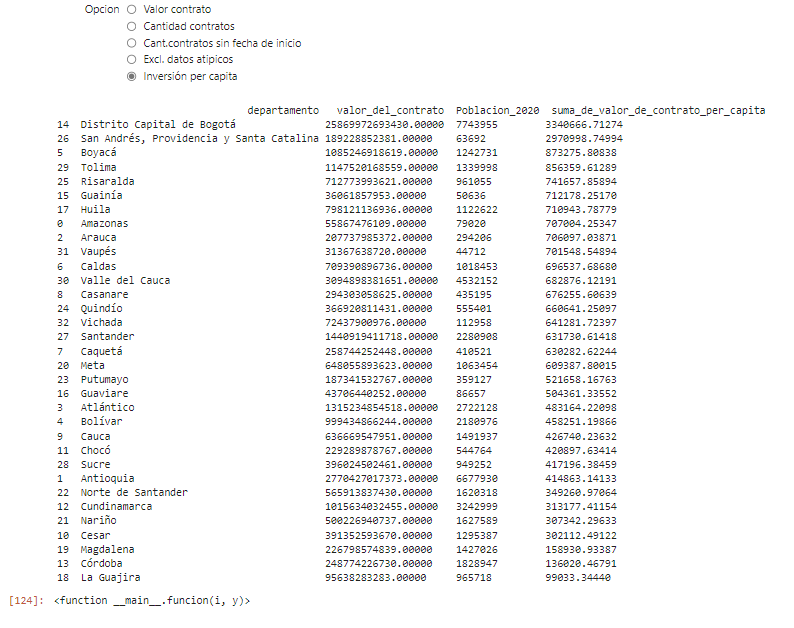

In [124]:
def funcion(i,y):
    #Se filtra el dataframe con el año seleccionado en el filtro
    DF2=results_df2[results_df2['agno_de_inicio_del_contrato']==i]
    
    #Condicional para determinar que accion ejecutar segun filtro
    if(y=='Valor contrato'): #Condicional para visualizar los valores de los contratos por año y departamento
        DF2=DF2.groupby(['agno_de_inicio_del_contrato','departamento'])[['valor_del_contrato']].sum().sort_values(
   by="valor_del_contrato",ascending=False)
        print(DF2)
    if(y=='Cantidad contratos'):  #Condicional para visualizar la cantidad de contratos por año y departamento
        DF2=DF2.groupby(['agno_de_inicio_del_contrato','departamento']).size().sort_values(ascending=False)
        print(DF2)
    if(y=='Cant.contratos sin fecha de inicio'): #Condicional para visualizar la cantidad de contratos por departamento que no tengan fecha de inicio
        DF2=results_df2[results_df2['agno_de_inicio_del_contrato'].isna()][['departamento']]
        DF2=DF2.groupby(['departamento']).size().sort_values(ascending=False) 
        print(DF2)
    if(y=='Excl. datos atipicos'):#Condicional para excluir los datos atipicos del contrato
        Q1=results_df2.quantile(0.25).values[0] #Determinar el valor del cuartil 1
        Q3=results_df2.quantile(0.75).values[0] #Determinar el valor del cuartil 3
        IQR=(Q3-Q1)*1.5 #Formula para calcular el rango intercuantilico *1.5, este valor se le restara al Q1 y se le sumara al Q3 para determinar los valores atipicos
        DF2=results_df2[(results_df2['valor_del_contrato']>=(Q1-IQR)) & (results_df2['valor_del_contrato']<=(Q3+IQR)) & (results_df2['agno_de_inicio_del_contrato']==i)]
        DF2=DF2.groupby(['agno_de_inicio_del_contrato','departamento']).size().sort_values(ascending=False) 
        print(DF2)
    if(y=='Inversión per capita'): #Condicional para visualizar la cantidad de contratos por departamento que no tengan fecha de inicio
        # Se extrae los valores de los contratos por departamento y se suman para tener un total
        DF3=results_df2.groupby(['departamento'])[['valor_del_contrato']].sum().sort_values(['departamento'],ascending = [True]) #Se crea un dataframe donde se agrupan los datos por 
        # departamento y se realiza la suma del valor del contrato y se organizaron los departamentos por orden alfabetico
        Datos_departamento = pd.merge(DF3, Poblacion_departamentos,on=["departamento", "departamento"])
        Datos_departamento['suma_de_valor_de_contrato_per_capita'] = Datos_departamento['valor_del_contrato'] / Datos_departamento['Poblacion_2020'] # Se crea una nueva columna en donde se divide la 
        # sumatoria de los valor de los contratos por la población de cada departamento para obtener un indice que se llama "suma_de_valor_de_contrato_per_capita"
        DF3=Datos_departamento.sort_values(['suma_de_valor_de_contrato_per_capita'],ascending = [False]) # Se organiza el dataframe según el indice de "suma_de_valor_de_contrato_per_capita" de mayor a menor
        print(DF3)
    return

#Visualizacion del reporte
interact(funcion,i=widgets.Dropdown(options=año,description="Year"),y=widgets.RadioButtons(options=['Valor contrato', 'Cantidad contratos', 'Cant.contratos sin fecha de inicio', 'Excl. datos atipicos', 'Inversión per capita'],description="Opcion"))

interactive(children=(Dropdown(description='Year', options=(2002, 2007, 2008, 2009, 2010, 2013, 2015, 2016, 20…

<function __main__.funcion(i, y)>